# Plot FeatureCollection

The `geetools` extension contains a set of functions for rendering charts from `ee.FeatureCollection` objects. The choice of function determines the arrangement of data in the chart, i.e., what defines x- and y-axis values and what defines the series. Use the following function descriptions and examples to determine the best function and chart type for your purpose.

[![github](https://img.shields.io/badge/-see%20sources-white?logo=github&labelColor=555)](https://github.com/gee-community/geetools/blob/main/docs/usage/plot/plot-featurecollection.ipynb)
[![colab](https://img.shields.io/badge/-open%20in%20colab-blue?logo=googlecolab&labelColor=555)](https://colab.research.google.com/github/gee-community/geetools/blob/main/docs/usage/plot/plot-featurecollection.ipynb)

In [1]:
import ee, pytest_gee, os

if "EARTHENGINE_SERVICE_ACCOUNT" in os.environ:
    pytest_gee.init_ee_from_service_account()
elif "EARTHENGINE_PROJECT" in os.environ:
    pytest_gee.init_ee_from_token()
else:
    raise ValueError("Cannot authenticate with Earth Engine.")

## Set up environment

Install all the required libs if necessary and perform the import statements upstream.

In [2]:
# uncomment if installation of libs is necessary
# !pip install earthengine-api geetools

In [3]:
from matplotlib import pyplot as plt

import ee
import geetools #noqa: F401

In [4]:
# uncomment if authetication to GEE is needed
# ee.Authenticate()
# ee.Intialize(project="<your_project>")

## Example data

The following examples rely on a FeatureCollection composed of three ecoregion features with properties that describe climate normals.

In [5]:
# Import the example feature collection.
ecoregions = ee.FeatureCollection('projects/google/charts_feature_example')

## Plot by features

Features are plotted along the x-axis by values of a selected property. Series are defined by a list of property names whose values are plotted along the y-axis. The type of produced chart can be controlled by the `type` parameter as shown in the following examples.

If you want to use another plotting library you can get the raw data using the `byFeatures` function.

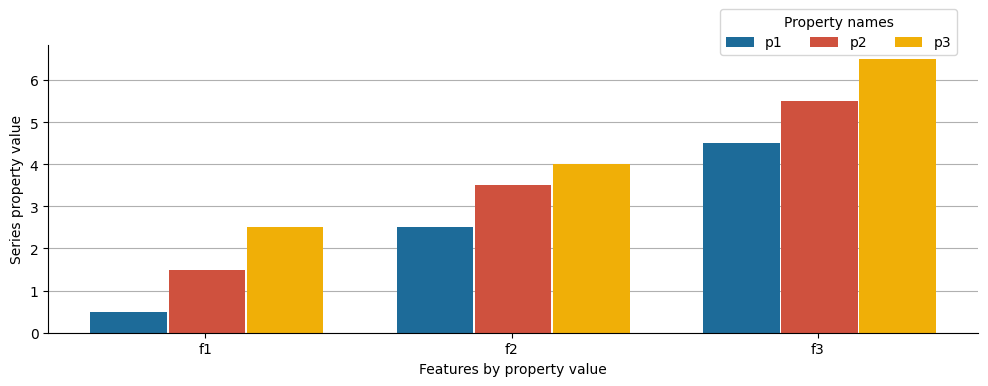

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the chart
features = ['f1', 'f2', 'f3']
p1_values = [0.5, 2.5, 4.5]
p2_values = [1.5, 3.5, 5.5]
p3_values = [2.5, 4.0, 6.5]

# Set the width of the bars
bar_width = 0.25
index = np.arange(len(features))
offset = 0.005

# Create the plot
fig, ax = plt.subplots(figsize=(10, 4))

# Plotting the bars
rects1 = ax.bar(index, p1_values, bar_width, label='p1', color='#1d6b99')
rects2 = ax.bar(index + (bar_width + offset), p2_values, bar_width, label='p2', color='#cf513e')
rects3 = ax.bar(index + 2 * (bar_width + offset), p3_values, bar_width, label='p3', color='#f0af07')

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Features by property value')
ax.set_ylabel('Series property value')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(features)

# Add a legend
ax.legend(loc='upper center', bbox_to_anchor=(0.85, 1.15), ncol=3, title='Property names')

# set the grid display
ax.grid(axis="y")
ax.set_axisbelow(True)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()

```{api}
- {py:meth}`plot_by_features <geetools.FeatureCollection.FeatureCollectionAccessor.plot_by_features>`: {docstring}`geetools.FeatureCollectionAccessor.plot_by_features`
- {py:meth}`byFeatures <geetools.FeatureCollection.FeatureCollectionAccessor.byFeatures>`: {docstring}`geetools.FeatureCollectionAccessor.byFeatures`
```

### Column chart

Features are plotted along the x-axis, labeled by values of a selected property. Series are represented by adjacent columns defined by a list of property names whose values are plotted along the y-axis.

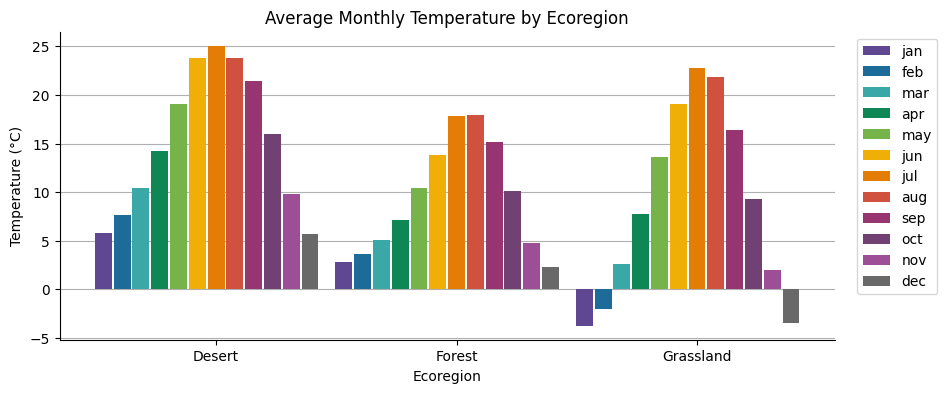

In [7]:
fig, ax = plt.subplots(figsize=(10, 4))

# initialize the plot with the ecoregions data
ecoregions.geetools.plot_by_features(
    type = "bar",
    featureId = "label",
    properties = ['01_tmean', '02_tmean', '03_tmean', '04_tmean', '05_tmean', '06_tmean', '07_tmean', '08_tmean', '09_tmean', '10_tmean', '11_tmean', '12_tmean'],
    labels = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"],
    colors = ['#604791', '#1d6b99', '#39a8a7', '#0f8755', '#76b349', '#f0af07', '#e37d05', '#cf513e', '#96356f', '#724173', '#9c4f97', '#696969'],
    ax = ax
)

# once created the axes can be modified as needed using pure matplotlib functions
ax.set_title("Average Monthly Temperature by Ecoregion")
ax.set_xlabel("Ecoregion")
ax.set_ylabel("Temperature (°C)")
plt.show()

### Stacked column chart

Features are plotted along the x-axis, labeled by values of a selected property. Series are represented by stacked columns defined by a list of property names whose values are plotted along the y-axis as the cumulative series sum.

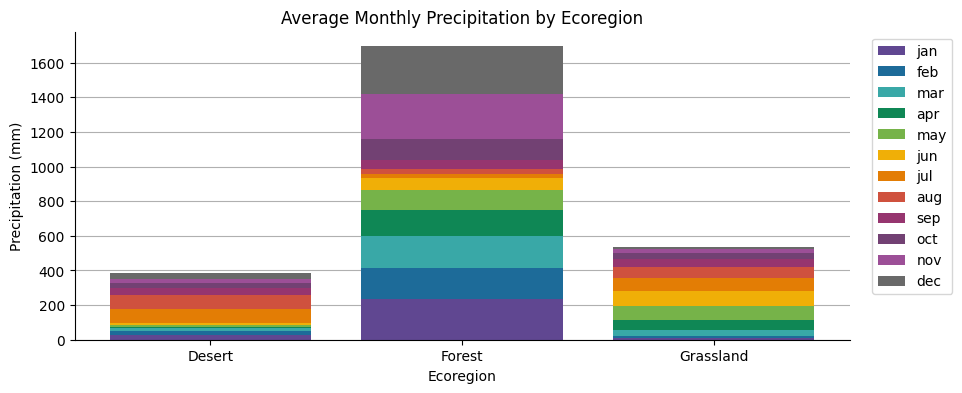

In [8]:
fig, ax = plt.subplots(figsize=(10, 4))

# initialize theplot with the ecoregions data
ecoregions.geetools.plot_by_features(
    type = "stacked",
    featureId = "label",
    properties = ['01_ppt', '02_ppt', '03_ppt', '04_ppt', '05_ppt', '06_ppt', '07_ppt', '08_ppt', '09_ppt', '10_ppt', '11_ppt', '12_ppt'],
    labels = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"],
    colors = ['#604791', '#1d6b99', '#39a8a7', '#0f8755', '#76b349', '#f0af07', '#e37d05', '#cf513e', '#96356f', '#724173', '#9c4f97', '#696969'],
    ax = ax
)

# once created the axes can be modified as needed using pure matplotlib functions
ax.set_title("Average Monthly Precipitation by Ecoregion")
ax.set_xlabel("Ecoregion")
ax.set_ylabel("Precipitation (mm)")
plt.show()

### Scatter chart

Features are plotted along the x-axis, labeled by values of a selected property. Series are represented by points defined by a list of property names whose values are plotted along the y-axis.

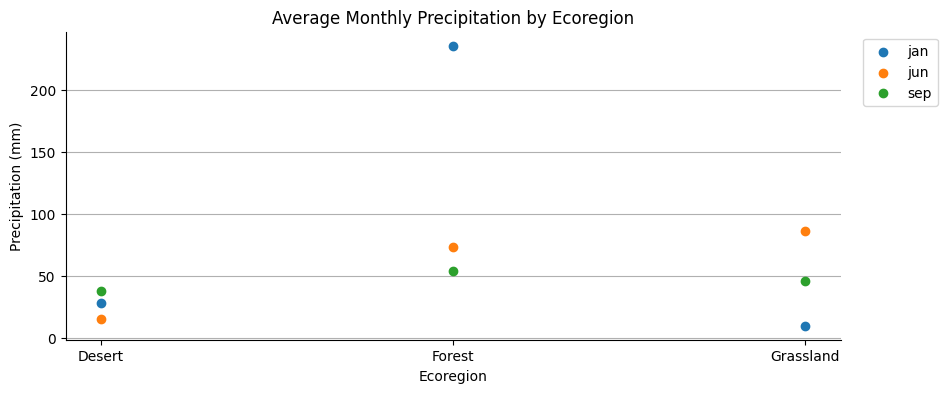

In [9]:
fig, ax = plt.subplots(figsize=(10, 4))

# initialize theplot with the ecoregions data
ecoregions.geetools.plot_by_features(
    type = "scatter",
    featureId = "label",
    properties = ['01_ppt', '06_ppt', '09_ppt'],
    labels = ["jan", "jun", "sep"],
    ax = ax
)

# once created the axes can be modified as needed using pure matplotlib functions
ax.set_title("Average Monthly Precipitation by Ecoregion")
ax.set_xlabel("Ecoregion")
ax.set_ylabel("Precipitation (mm)")
plt.show()

### Pie chart

The pie is a property, each slice is the share from each feature whose value is cast as a percentage of the sum of all values of features composing the pie.

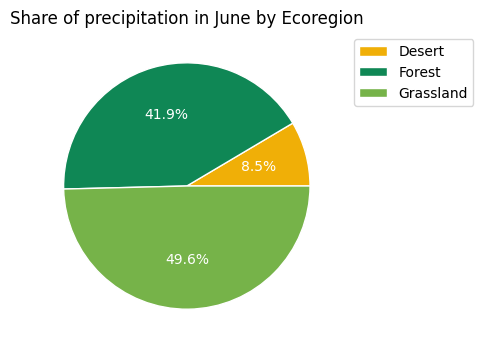

In [10]:
fig, ax = plt.subplots(figsize=(10, 4))

# initialize theplot with the ecoregions data
ecoregions.geetools.plot_by_features(
    type = "pie",
    featureId = "label",
    properties = ['06_ppt'],
    colors = ["#f0af07", "#0f8755", "#76b349"],
    ax = ax
)

# once created the axes can be modified as needed using pure matplotlib functions
ax.set_title("Share of precipitation in June by Ecoregion")
plt.show()

### Donut chart

The donut is a property, each slice is the share from each feature whose value is cast as a percentage of the sum of all values of features composing the donut.

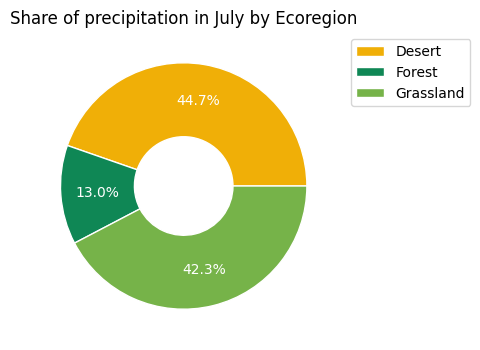

In [11]:
fig, ax = plt.subplots(figsize=(10, 4))

# initialize theplot with the ecoregions data
ecoregions.geetools.plot_by_features(
    type = "donut",
    featureId = "label",
    properties = ['07_ppt'],
    colors = ["#f0af07", "#0f8755", "#76b349"],
    ax = ax
)

# once created the axes can be modified as needed using pure matplotlib functions
ax.set_title("Share of precipitation in July by Ecoregion")
plt.show()

## Plot by properties

Feature properties are plotted along the x-axis by name; values of the given properties are plotted along the y-axis. Series are features labeled by values of a selected property. The type of produced chart can be controlled by the `type` parameter as shown in the following examples.

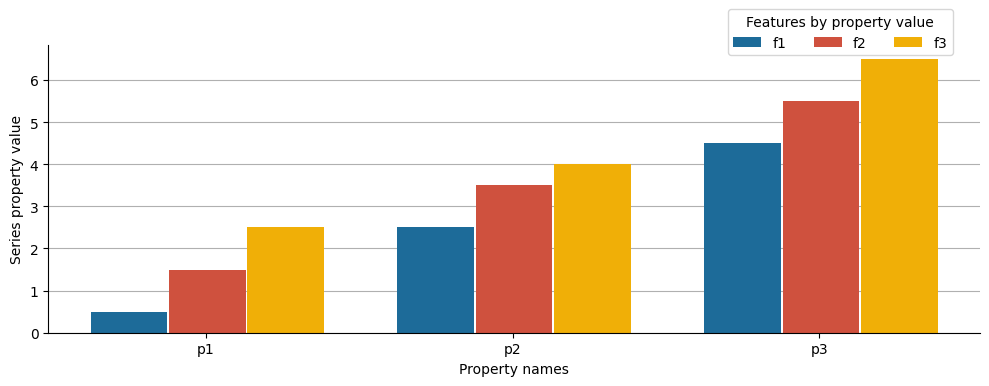

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the chart
features = ['p1', 'p2', 'p3']
p1_values = [0.5, 2.5, 4.5]
p2_values = [1.5, 3.5, 5.5]
p3_values = [2.5, 4.0, 6.5]

# Set the width of the bars
bar_width = 0.25
index = np.arange(len(features))
offset = 0.005

# Create the plot
fig, ax = plt.subplots(figsize=(10, 4))

# Plotting the bars
rects1 = ax.bar(index, p1_values, bar_width, label='f1', color='#1d6b99')
rects2 = ax.bar(index + (bar_width + offset), p2_values, bar_width, label='f2', color='#cf513e')
rects3 = ax.bar(index + 2 * (bar_width + offset), p3_values, bar_width, label='f3', color='#f0af07')

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Property names')
ax.set_ylabel('Series property value')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(features)

# Add a legend
ax.legend(loc='upper center', bbox_to_anchor=(0.85, 1.15), ncol=3, title='Features by property value')

# set the grid display
ax.grid(axis="y")
ax.set_axisbelow(True)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()

```{api}
{py:meth}`plot_by_properties <geetools.FeatureCollection.FeatureCollectionAccessor.plot_by_properties>`: {docstring}`geetools.FeatureCollectionAccessor.plot_by_properties`
{py:meth}`byProperties <geetools.FeatureCollection.FeatureCollectionAccessor.byProperties>`: {docstring}`geetools.FeatureCollectionAccessor.byProperties`
```

## Column chart

Feature properties are plotted along the x-axis, labeled and sorted by a dictionary input; the values of the given properties are plotted along the y-axis. Series are features, represented by columns, labeled by values of a selected property.

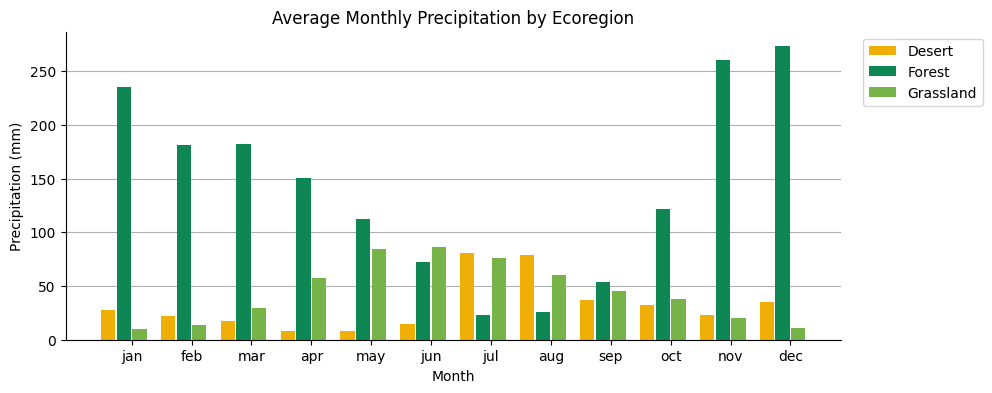

In [13]:
fig, ax = plt.subplots(figsize=(10, 4))


# initialize theplot with the ecoregions data
ax = ecoregions.geetools.plot_by_properties(
    type = "bar",
    properties = ['01_ppt', '02_ppt', '03_ppt', '04_ppt', '05_ppt', '06_ppt', '07_ppt', '08_ppt', '09_ppt', '10_ppt', '11_ppt', '12_ppt'],
    labels = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"],
    featureId = "label",
    colors = ["#f0af07", "#0f8755", "#76b349"],
    ax = ax
)

# once created the axes can be modified as needed using pure matplotlib functions
ax.set_title("Average Monthly Precipitation by Ecoregion")
ax.set_xlabel("Month")
ax.set_ylabel("Precipitation (mm)")
plt.show()

## Line chart

Feature properties are plotted along the x-axis, labeled and sorted by a dictionary input; the values of the given properties are plotted along the y-axis. Series are features, represented by columns, labeled by values of a selected property.

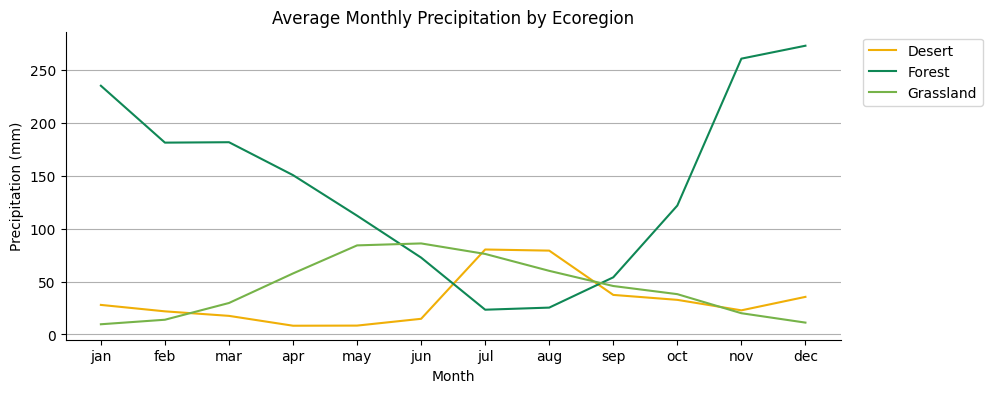

In [14]:
fig, ax = plt.subplots(figsize=(10, 4))

# initialize theplot with the ecoregions data
ax = ecoregions.geetools.plot_by_properties(
    type = "plot",
    properties = ["01_ppt", "02_ppt", "03_ppt", "04_ppt", "05_ppt", "06_ppt", "07_ppt", "08_ppt", "09_ppt", "10_ppt", "11_ppt", "12_ppt"],
    featureId = "label",
    labels = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"],
    colors = ["#f0af07", "#0f8755", "#76b349"],
    ax = ax
)

# once created the axes can be modified as needed using pure matplotlib functions
ax.set_title("Average Monthly Precipitation by Ecoregion")
ax.set_xlabel("Month")
ax.set_ylabel("Precipitation (mm)")
plt.show()

### Area chart 

Feature properties are plotted along the x-axis, labeled and sorted by a dictionary input; the values of the given properties are plotted along the y-axis. Series are features, represented by lines and shaded areas, labeled by values of a selected property.

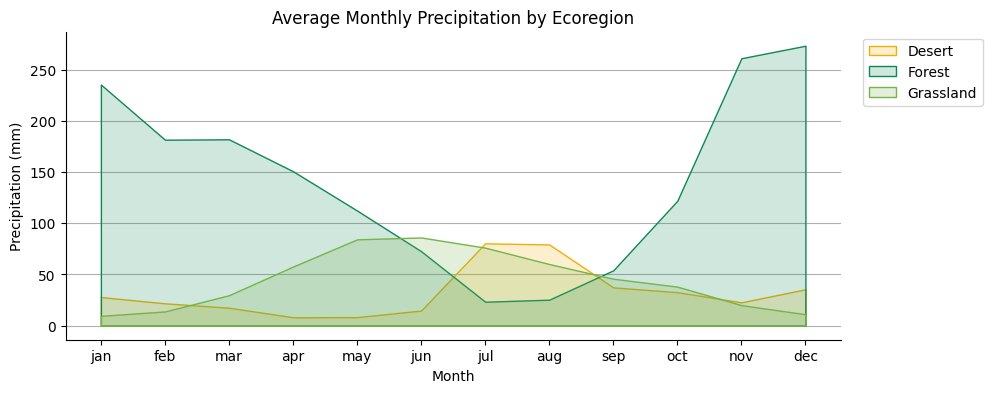

In [15]:
fig, ax = plt.subplots(figsize=(10, 4))

# initialize the plot with the ecoregions data
ax = ecoregions.geetools.plot_by_properties(
    type = "fill_between",
    properties = ["01_ppt", "02_ppt", "03_ppt", "04_ppt", "05_ppt", "06_ppt", "07_ppt", "08_ppt", "09_ppt", "10_ppt", "11_ppt", "12_ppt"],
    labels = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"],
    featureId = "label",
    colors = ["#f0af07", "#0f8755", "#76b349"],
    ax = ax
)

# once created the axes can be modified as needed using pure matplotlib functions
ax.set_title("Average Monthly Precipitation by Ecoregion")
ax.set_xlabel("Month")
ax.set_ylabel("Precipitation (mm)")
plt.show()

## Plot hist

```{api}
{py:meth}`plot_hist <geetools.FeatureCollection.FeatureCollectionAccessor.plot_hist>`: {docstring}`geetools.FeatureCollectionAccessor.plot_hist`
```

The x-axis is defined by value bins for the range of values of a selected property; the y-axis is the number of elements in the given bin.

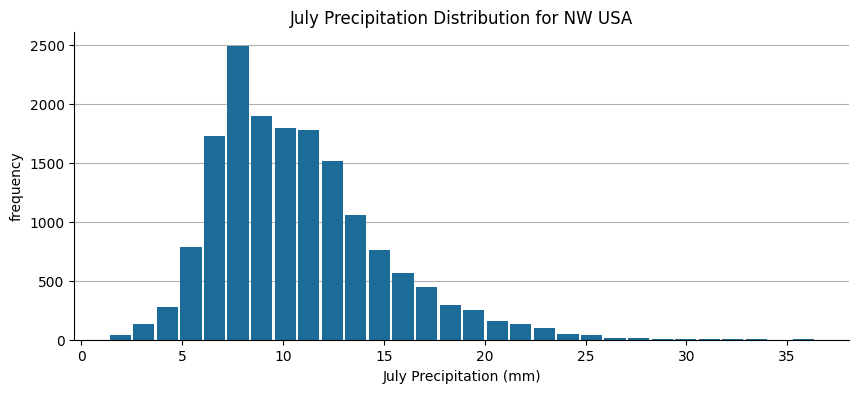

In [16]:
fig, ax = plt.subplots(figsize=(10, 4))

# load some data
normClim = ee.ImageCollection('OREGONSTATE/PRISM/Norm91m').toBands()

# Make a point sample of climate variables for a region in western USA.
region = ee.Geometry.Rectangle(-123.41, 40.43, -116.38, 45.14)
climSamp = normClim.sample(region, 5000)


# initialize the plot with the ecoregions data
ax = climSamp.geetools.plot_hist(
    property = "07_ppt",
    label = "July Precipitation (mm)",
    color = '#1d6b99',
    ax = ax,
    bins = 30
)

# once created the axes can be modified as needed using pure matplotlib functions
ax.set_title("July Precipitation Distribution for NW USA")
plt.show()